In [1]:
import nbimporter
import vanGenuchten as vG
import numpy as np
import matplotlib.pyplot as plt

Importing Jupyter notebook from vanGenuchten.ipynb


### Bentheimer Sandstoneの物性値  
参考：V.Voronina, L. Pel and K. Kopinga: The influence of osmotic pressure on poulticing treatments for heritage objects, Material and Structures, vol.46, pp221-231, 2013  


$\psi$：空隙率(porosity)[-]  

In [2]:
def psi():
    return 0.23

$C$：材料の比熱(specific heat)[J/(kg・K)]  

In [3]:
def C():
    return 750.0

$\rho$：材料の密度(density)[kg/m3]

In [4]:
def row():
    return 1479.25

$K_{sat}$：飽和透水係数(liquid permeability)[m2/s]  

In [5]:
def Ksat():
    return 2.0e-7

$\delta_p$：絶乾時の透湿率(moisture permeability)[kg/m Pa s]

In [6]:
def DP():
    return 2.0E-10

$\rho_w$：水の密度(moisture density)[kg/m3]

In [7]:
def roww():
    return 1000.0

$C_r$：水の比熱(specific heat of water)[J/(kg・K)]

In [8]:
def Cr():
    return 4.18605E+3

#### van-Genuchten用情報

In [9]:
def vG_info():
    return {
        'Alfa'   : 10.0/98.0,
        'n'      : 2.0,
        'm'      : 1.0 - ( 1.0 / 2.0 ),
        'l'      : 0.5,
    }

In [10]:
vG_info()['Alfa']

0.10204081632653061

## Functions

#### 熱容量

In [11]:
def getCRowByMiu( temp, miu ):
    return C() * row() + Cr() * roww() * getPhiByMiu( temp, miu )

#### 熱伝導率

In [12]:
def getLAMByMiu( temp, miu ):
    return 1.2

#### 含水率

In [13]:
def getPhiByMiu( temp, miu ):
    return vG.getPhi( psi(), vG_info()['Alfa'], miu, vG_info()['m'], vG_info()['n'] )

#### 含水率から水分化学ポテンシャル

In [14]:
def getMiuByPhi( temp, phi ):
    return vG.getMiu( psi(), phi, vG_info()['Alfa'], vG_info()['m'], vG_info()['n'] )

#### 透水係数

In [15]:
def getDwByMiu( temp, miu ):
    return Ksat() * vG.getKl( vG_info()['Alfa'], miu, vG_info()['m'], vG_info()['n'], vG_info()['l'] )

#### 透湿率（湿気伝導率）

In [16]:
def getDPByMiu( temp, miu ):
    Phi = getPhiByMiu( temp, miu )
    Sl  = Phi / psi()
    return DP() * ( 1.0 - Sl * 0.9 )

#### 含水率の水分化学ポテンシャル微分

In [17]:
def getDPhiByMiu( temp, miu ):
    return vG.getDPhi( psi(), vG_info()['Alfa'], miu, vG_info()['m'], vG_info()['n'] )

In [18]:
temp = 293.15
miu  = -10.0

In [19]:
getCRowByMiu( temp, miu )

1783322.7897029277

In [20]:
getLAMByMiu( temp, miu )

1.2

In [21]:
getPhiByMiu( temp, miu )

0.16098357394272111

In [22]:
getMiuByPhi( temp, 0.22 )

-2.988199933567902

In [23]:
getDwByMiu( temp, miu )

1.3666027427457417e-08

In [24]:
getDPByMiu( temp, miu )

7.401285517526175e-11

In [25]:
getDPhiByMiu( temp, miu )

0.008211771778347334

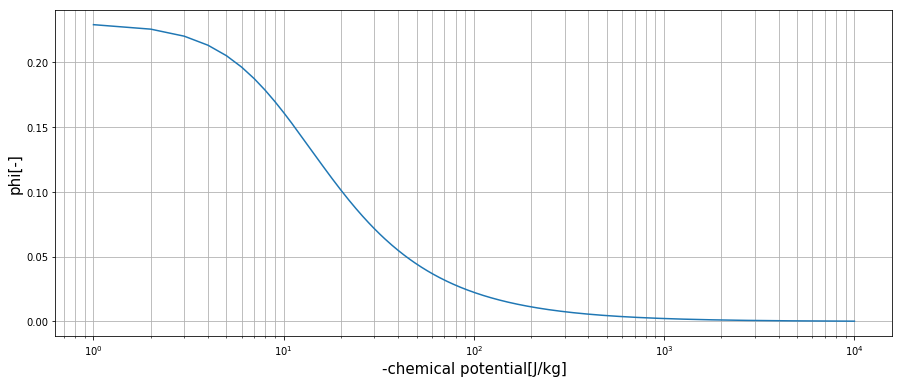

In [26]:
#######################################
###     物性値の確認     ###
###     グラフの描画      ###
plt.figure(figsize = (15.0, 6))
plt.xscale("log")
#plt.yscale("log")
plt.grid(which="both")
plt.xlabel("-chemical potential[J/kg]", fontsize = 15)
plt.ylabel("phi[-]", fontsize = 15)
miu  = np.arange(-10000,0.0,1.0)
temp = 293.15
phi = getPhiByMiu( temp, miu )
plt.plot( -miu , phi )
plt.show()
###########################